# [Kaggle_Sleep Health and Lifestyle Dataset](https://www.kaggle.com/datasets/uom190346a/sleep-health-and-lifestyle-dataset)
- 데이터 설명
    - Person ID: An identifier for each individual.
    - Gender: The gender of the person (Male/Female).
    - Age: The age of the person in years.
    - Occupation: The occupation or profession of the person.
    - Sleep Duration (hours): The number of hours the person sleeps per day.
    - Quality of Sleep (scale: 1-10): A subjective rating of the quality of sleep, ranging from 1 to 10.
    - Physical Activity Level (minutes/day): The number of minutes the person engages in physical activity daily.
    - Stress Level (scale: 1-10): A subjective rating of the stress level experienced by the person, ranging from 1 to 10.
    - BMI Category: The BMI category of the person (e.g., Underweight, Normal, Overweight).
    - Blood Pressure (systolic/diastolic): The blood pressure measurement of the person, indicated as systolic pressure over diastolic pressure.
    - Heart Rate (bpm): The resting heart rate of the person in beats per minute.
    - Daily Steps: The number of steps the person takes per day.
    - Sleep Disorder: The presence or absence of a sleep disorder in the person (None, Insomnia, Sleep Apnea).

## 1. EDA

In [5]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')
plt.rc('font', family='Malgun Gothic')
plt.rcParams['axes.unicode_minus']=False

df_raw = pd.read_csv(os.getcwd() + '/data/sleep/Sleep_health_and_lifestyle_dataset.csv')
display(df_raw.head())
print(df_raw.shape)
print(df_raw.info())
print(df_raw.isna().sum())

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


(374, 13)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           374 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB
None
Person 

In [26]:
# Blood Pressure 전처리
df = df_raw.copy()
pre_max = []
pre_min = []

for val1, val2 in df['Blood Pressure'].str.split('/'):
    pre_max.append(int(val1))
    pre_min.append(int(val2))
df['pre_max'] = pre_max
df['pre_min'] = pre_min

# 필요없는 칼럼 삭제
df.drop(['Person ID', 'Blood Pressure'], axis=1, inplace=True)
df.head()

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder,pre_max,pre_min
0,Male,27,Software Engineer,6.1,6,42,6,Overweight,77,4200,None,126,83
1,Male,28,Doctor,6.2,6,60,8,Normal,75,10000,None,125,80
2,Male,28,Doctor,6.2,6,60,8,Normal,75,10000,None,125,80
3,Male,28,Sales Representative,5.9,4,30,8,Obese,85,3000,Sleep Apnea,140,90
4,Male,28,Sales Representative,5.9,4,30,8,Obese,85,3000,Sleep Apnea,140,90


In [27]:
df.describe()

,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps,pre_max,pre_min
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,42.184492,7.132086,7.312834,59.171123,5.385027,70.165775,6816.844920,128.553476,84.649733
std,8.673133,0.795657,1.196956,20.830804,1.774526,4.135676,1617.915679,7.748118,6.161611
min,27.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3000.000000,115.000000,75.000000
25%,35.250000,6.400000,6.000000,45.000000,4.000000,68.000000,5600.000000,125.000000,80.000000
50%,43.000000,7.200000,7.000000,60.000000,5.000000,70.000000,7000.000000,130.000000,85.000000
75%,50.000000,7.800000,8.000000,75.000000,7.000000,72.000000,8000.000000,135.000000,90.000000
max,59.000000,8.500000,9.000000,90.000000,8.000000,86.000000,10000.000000,142.000000,95.000000


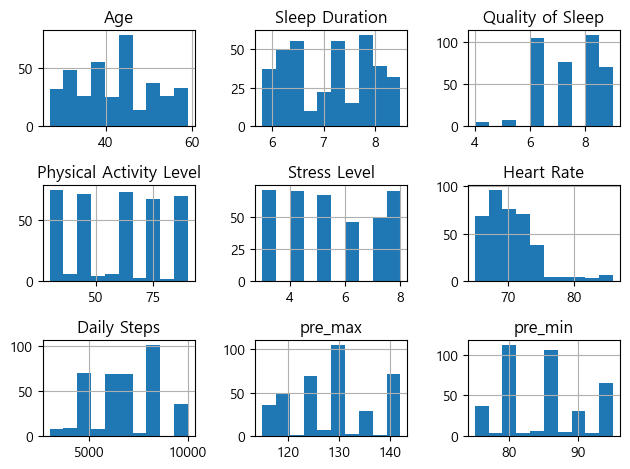

In [28]:
df.hist()
plt.tight_layout();

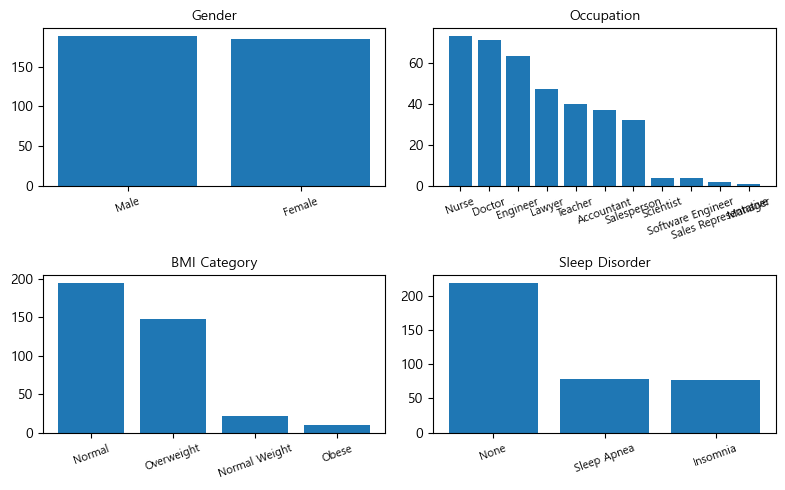

In [67]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(8, 5))
for i, feature in zip(range(4), df.select_dtypes(include='object').columns):
    row = int(i/2)
    col = i%2
    ax[row][col].bar(df[feature].value_counts().index, df[feature].value_counts().values)
    ax[row][col].set_title(feature, size=10)
    ax[row][col].tick_params(axis='x', rotation=20, labelsize=8)
plt.tight_layout()
plt.show()

In [74]:
# 종속변수를 수치형으로 변환
def chag_cate(x):
    if x == 'None':
        return 0
    elif x == 'Sleep Apnea':
        return 1
    else:
        return 2
    
df['Sleep Disorder'] = df['Sleep Disorder'].apply(chag_cate)
df.head(3)

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder,pre_max,pre_min
0,Male,27,Software Engineer,6.1,6,42,6,Overweight,77,4200,0,126,83
1,Male,28,Doctor,6.2,6,60,8,Normal,75,10000,0,125,80
2,Male,28,Doctor,6.2,6,60,8,Normal,75,10000,0,125,80


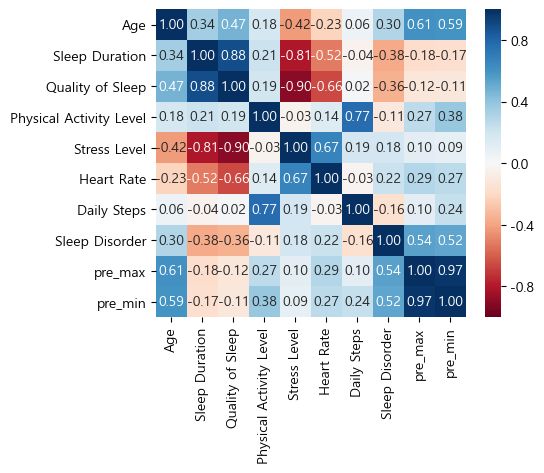

In [75]:
df_corr = df.corr()
plt.figure(figsize=(5,4))
sns.heatmap(df_corr, annot=True, vmax=1, vmin=-1, fmt='.2f', cmap='RdBu');

[해석]
1. 결측치 존재 여부
    - 전체 데이터에서 결측치는 존재하지 않는다.
1. 데이터 타입
    - 종속변수는 object형, 독립변수는 int, float, object형으로 구성되어 있다.
1. 종속변수와 독립변수의 상관관계
    - 종속변수와 독립변수 간에 큰 상관성은 확인할 수 없었다.
    - 상대적으로 큰 상관성을 보이는 변수는 pre_max(0.54), pre_min(0.52)으로 나타났다.
1. 독립변수 상관관계
    - 독립변수들끼리의 상관성을 확인한 결과, 다중공선성을 의심할만한 관계가 나타났다.
    - pre_max, pre_min의 상관계수는 0.97로 나타났다. 이는 Blood Pressure의 systolic와 diastolic 값을 따로 분리한 것인데, 수축기와 이완기 간에 상관성이 높다고 추측할 수 있다.
    - 또한 Stress Level과 Quality of Sleep 간에는 높은 음의 상관성(-0.9)이 나타났다.
    - 이외에도 Sleep Duration과 Quality of Sleep, 그리고 Sleep Duration과 Stress Level 간에도 높은 상관성이 있다.
1. 주의할 점
    - 종속변수의 클래스 개수에 불균형 이슈가 우려된다. 따라서 오버샘플링 및 언더샘플링 기법을 적용해야 할 것이다.
    - 다중공선성 문제를 방지하기 위해 서로 상관이 높은 변수 중 하나의 변수만 이용하거나 다중공선성 문제를 해결할 수 있는 SVM, XGBoost 등의 모델을 사용할 수 있다.
    - 독립변수의 수치형 변수들은 값의 범위가 서로 다르므로 스케일링을 통해 범위를 통일시킬 필요가 있을 것이다.
    - 독립변수의 범주형 변수들은 원-핫 인코딩을 통해 0 또는 1 값으로 변환하여 모델에 적용해야 한다.

## 2. 통계 분석

In [76]:
import scipy.stats as stats